# `microdf` charts

This example requires `taxcalc` to be installed.

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import microdf as mdf

In [2]:
mdf.set_plot_style()

/home/mghenis/anaconda3/lib/python3.7/site-packages/microdf/style.py:24: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  fm.fontManager.ttflist += fm.createFontList(["Roboto-Regular.ttf"])


## Prepare data

In [3]:
base = mdf.calc_df(group_vars=['expanded_income', 'MARS'],
                   metric_vars=['aftertax_income', 'XTOT'])

In [4]:
reform = base.copy(deep=True)
UBI_PP = 10000
reform['ubi'] = reform.XTOT * UBI_PP
reform['aftertax_income'] = reform.aftertax_income + reform.ubi
mdf.add_weighted_metrics(reform, 'aftertax_income')

## Charts

### Change to income percentiles

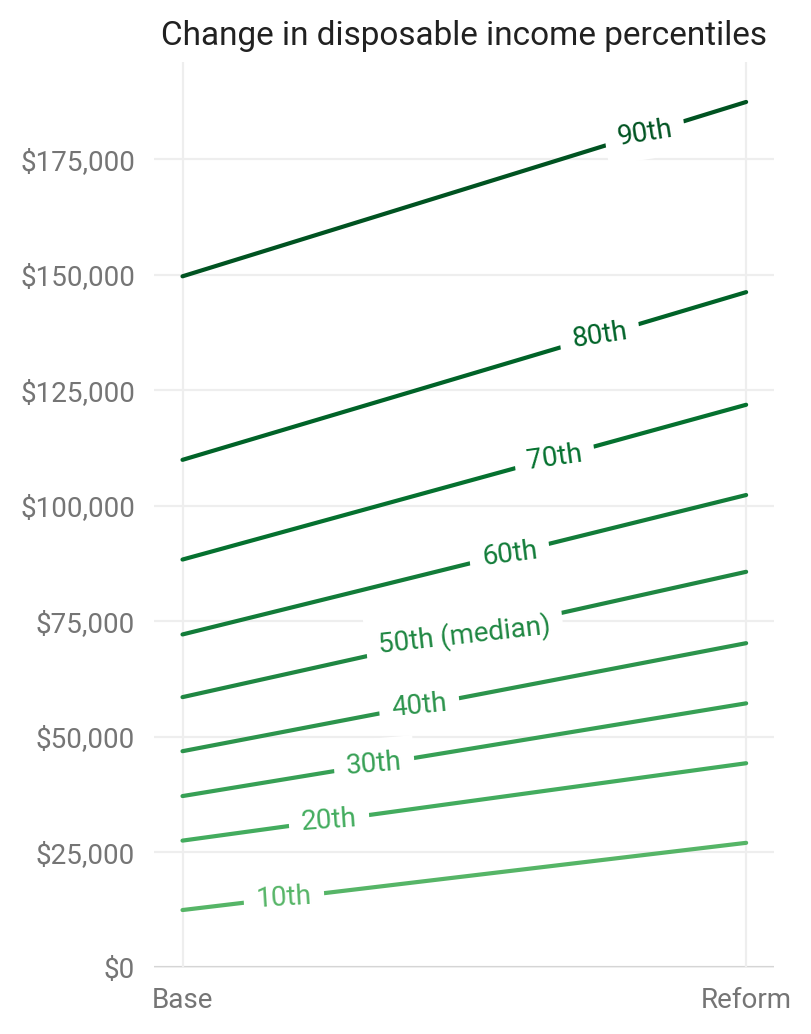

In [5]:
ax = mdf.quantile_chg_plot(df1=base, df2=reform,
                           col1='aftertax_income', col2='aftertax_income',
                           w1='XTOT_m', w2='XTOT_m')
plt.show()

### Percent change to income percentiles

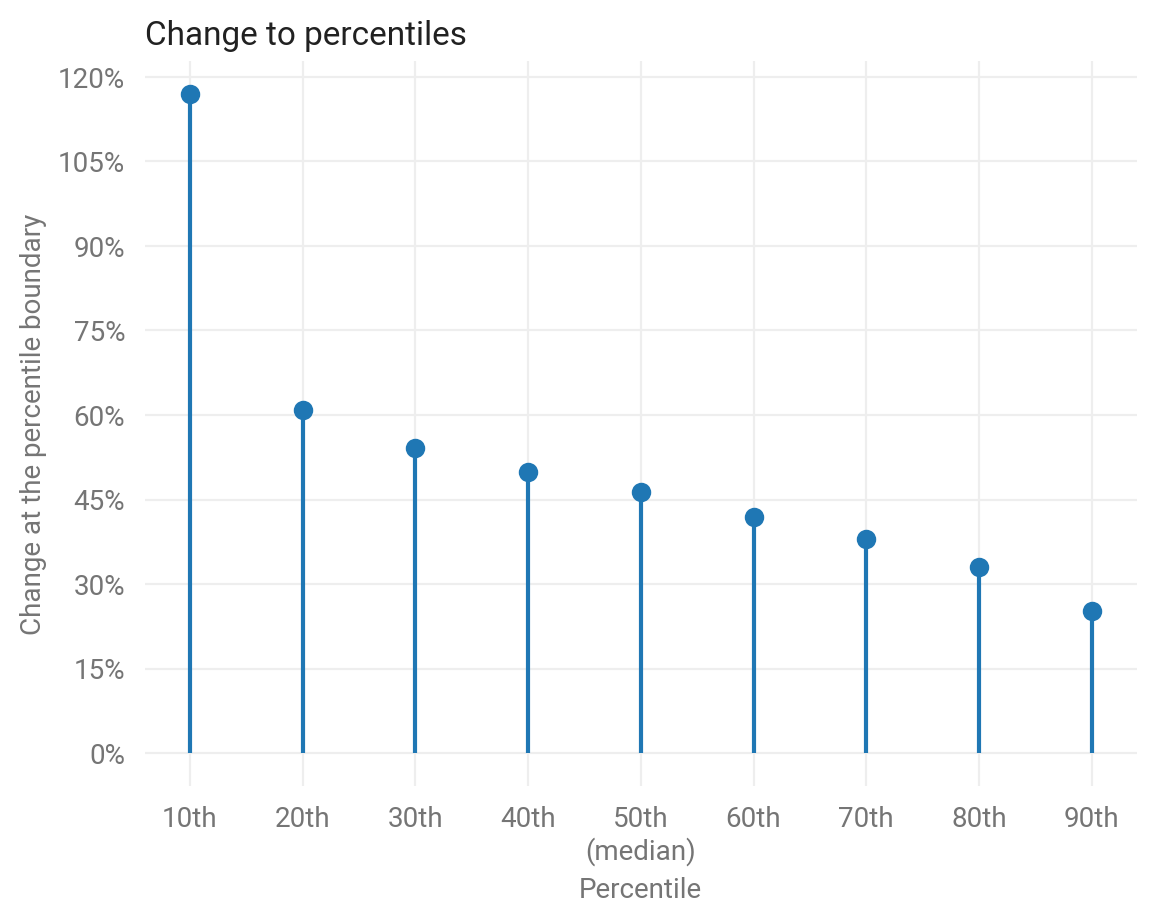

In [6]:
mdf.quantile_pct_chg_plot(df1=base, df2=reform,
                          col1='aftertax_income', col2='aftertax_income',
                          w1='XTOT_m', w2='XTOT_m')
plt.show()

Make the title and labels more descriptive to this data.

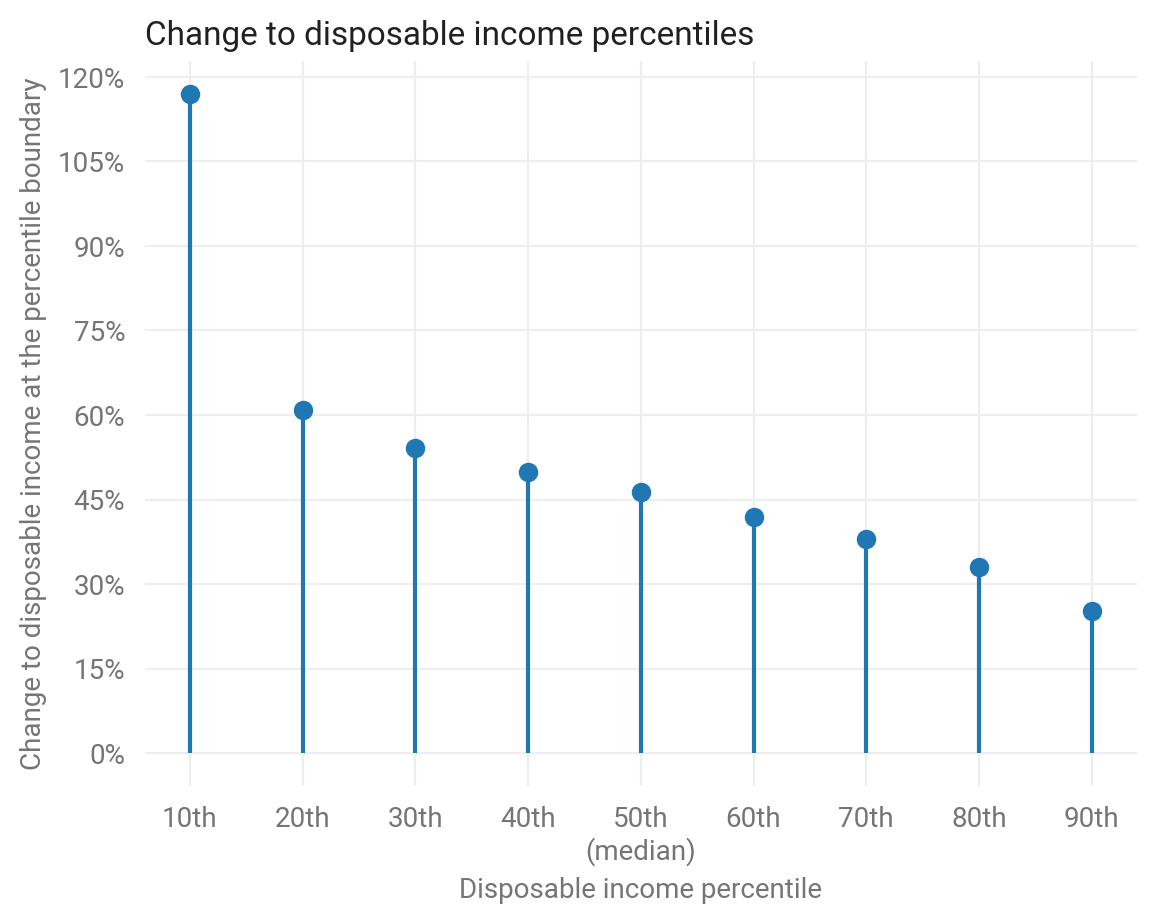

In [7]:
mdf.quantile_pct_chg_plot(df1=base, df2=reform,
                          col1='aftertax_income', col2='aftertax_income',
                          w1='XTOT_m', w2='XTOT_m')
# Note: Must set `loc='left'`, otherwise two titles will overlap.
plt.title('Change to disposable income percentiles', loc='left')
plt.xlabel('Disposable income percentile')
plt.ylabel('Change to disposable income at the percentile boundary')
plt.show()

### Other percentiles and labels

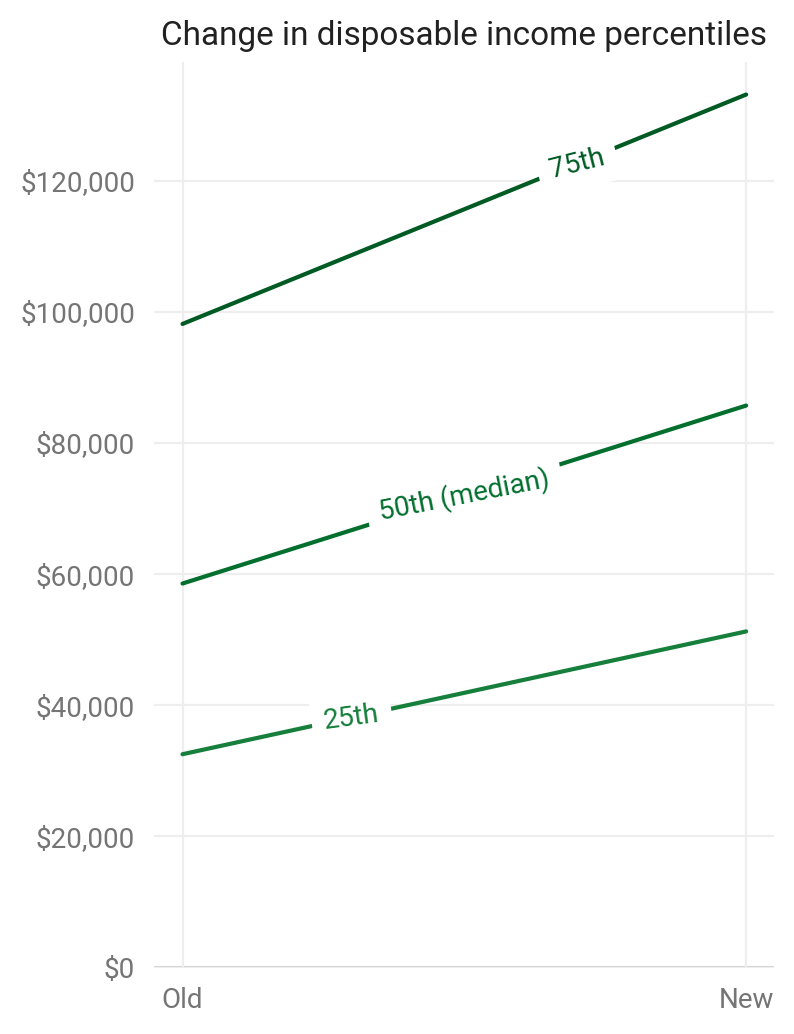

In [8]:
mdf.quantile_chg_plot(df1=base, df2=reform,
                      col1='aftertax_income', col2='aftertax_income',
                      w1='XTOT_m', w2='XTOT_m',
                      q=np.arange(0.25, 1, 0.25),
                      label1='Old', label2='New')
plt.show()

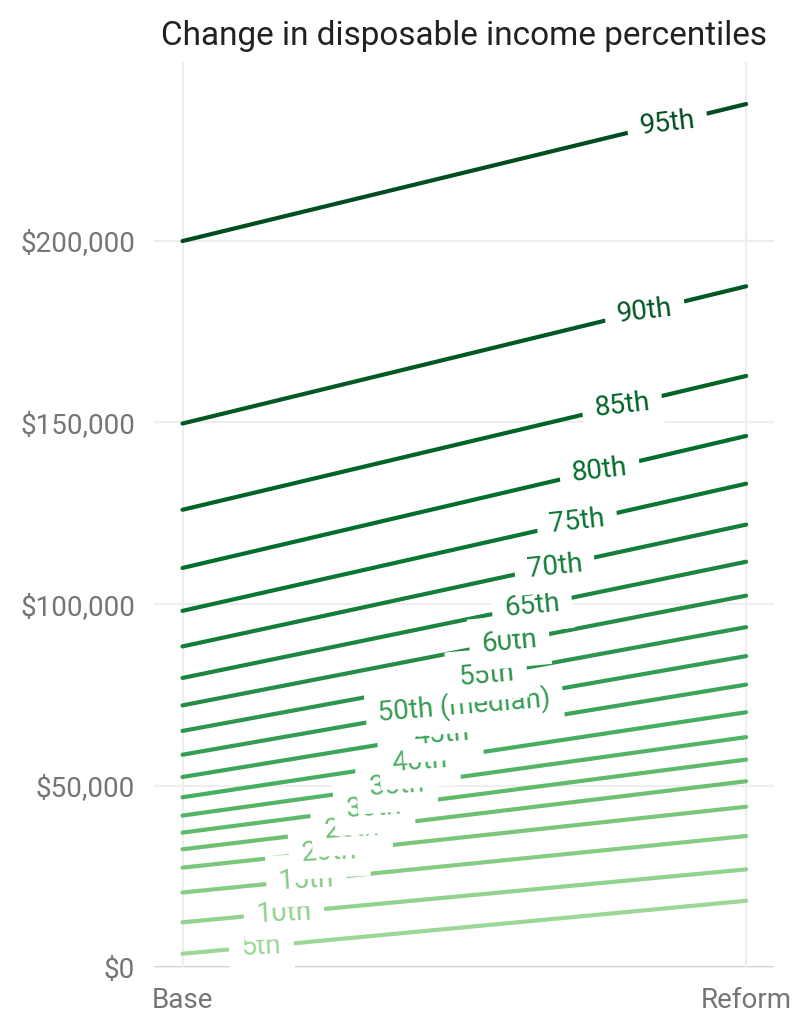

In [9]:
mdf.quantile_chg_plot(df1=base, df2=reform,
                      col1='aftertax_income', col2='aftertax_income',
                      w1='XTOT_m', w2='XTOT_m',
                      q=np.arange(0.05, 1, 0.05))
plt.show()